# Sprint 公開されている実装を動かす

## 0.準備

In [1]:
!pip install tensorflow==1.5.0

     |████████████████████████████████| 44.4MB 99kB/s 
     |████████████████████████████████| 3.0MB 63.7MB/s 
     |████████████████████████████████| 890kB 61.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=7fabe42fa8b8c8098427ced91ca31d83931df100ec1548d3aaf07d773949c249
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.0
    Uninstalling bleach-3.2.0:
      Successfully uninstalled bleach-3.2.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [2]:
!pip install keras==2.2

     |████████████████████████████████| 307kB 3.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
import tensorflow

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

In [ ]:
tensorflow.__version__

'1.5.0'

In [ ]:
!pip install kaggle

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
mkdir .kaggle

In [ ]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


In [ ]:
#cd drive/"My Drive"

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"obata1205","key":"d80541bc0beffcc8c1684471fcfbf2f4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
pwd

'/content/drive/My Drive/ObjectDetection'

In [ ]:
ls -a .kaggle

./  ../  kaggle.json


In [ ]:
mkdir　/root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        281           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        118           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        368           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2417           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18469           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4772            True  
connectx

In [ ]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [ ]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

# !kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:31<00:00, 117MB/s]
100% 1.08G/1.08G [00:31<00:00, 36.7MB/s]


In [ ]:
# !unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 46 (delta 3), reused 6 (delta 1), pack-reused 28
Unpacking objects: 100% (46/46), done.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよfう。

In [ ]:
mv Simpsons/simpsons_dataset ObjectDetection/

mv: cannot stat 'Simpsons/simpsons_dataset': No such file or directory


In [ ]:
!mv 

mv: missing file operand
Try 'mv --help' for more information.


## 2.Faster R-CNN

Faster R-CNN[1]の実装を動かします。


[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


<a href="https://arxiv.org/pdf/1506.01497.pdf">
https://arxiv.org/pdf/1506.01497.pdf
</a>


以下のものを使用してください。Kerasを使用した実装です。

<a href="https://github.com/duckrabbits/ObjectDetection/tree/master">
duckrabbits/ObjectDetection at master  
</a>



## 問題1以降の環境設定

## 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install tensorflow-gpu==1.14.0

  Using cached https://files.pythonhosted.org/packages/76/04/43153bfdfcf6c9a4c38ecdb971ca9a75b9a791bb69a764d652c359aca504/tensorflow_gpu-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: tensorflow-gpu 1.5.0
    Uninstalling tensorflow-gpu-1.5.0:
      Successfully uninstalled tensorflow-gpu-1.5.0


In [9]:
!pip install keras==2.3.1

In [4]:
import tensorflow

In [9]:
cd '/content/drive/My Drive/ObjectDetection/'

/content/drive/My Drive/ObjectDetection


In [ ]:
!python train.py -p annotation.txt --n_epochs 1000

ストリーミング出力は最後の 5000 行に切り捨てられました。
Elapsed time: 14.311973810195923[s]
Epoch 510/1000
10/10 [==============================] - 12s 1s/step - rpn_cls: 0.0399 - rpn_regr: 0.1071 - detector_cls: 1.5748 - detector_regr: 0.3820
Mean number of bounding boxes from RPN overlapping ground truth boxes: 27.272727272727273
Classifier accuracy for bounding boxes from RPN: 0.55
Loss RPN classifier: 0.18825759312178575
Loss RPN regression: 0.09403459187597037
Loss Detector classifier: 1.5644292682409286
Loss Detector regression: 0.3032704383134842
Elapsed time: 13.577814817428589[s]
Epoch 511/1000
Average number of overlapping bounding boxes from RPN = 26.9 for 10 previous iterations
10/10 [==============================] - 14s 1s/step - rpn_cls: 0.4275 - rpn_regr: 0.0979 - detector_cls: 1.8363 - detector_regr: 0.3589
Average number of overlapping bounding boxes from RPN = 25.9 for 10 previous iterations
Mean number of bounding boxes from RPN overlapping ground truth boxes: 24.727272727272727
Classifier

In [13]:
ll '/content/drive/My Drive/ObjectDetection/save/'

total 894821
-rw------- 1 root      1290 Sep 24 06:53 train_20200924-065324_config.pickle
-rw------- 1 root      1290 Sep 24 07:11 train_20200924-071028_config.pickle
-rw------- 1 root      1290 Sep 24 07:12 train_20200924-071156_config.pickle
-rw------- 1 root      1290 Sep 24 07:13 train_20200924-071308_config.pickle
-rw------- 1 root 114534680 Sep 24 07:15 train_20200924-071308_model.hdf5
-rw------- 1 root      1290 Sep 24 07:35 train_20200924-073515_config.pickle
-rw------- 1 root 114534680 Sep 24 07:37 train_20200924-073515_model.hdf5
-rw------- 1 root      1290 Sep 24 07:48 train_20200924-074828_config.pickle
-rw------- 1 root 114534680 Sep 24 07:51 train_20200924-074828_model.hdf5
-rw------- 1 root      1290 Sep 24 08:15 train_20200924-075345_config.pickle
-rw------- 1 root 114534680 Sep 24 08:17 train_20200924-075345_model.hdf5
-rw------- 1 root      1290 Sep 24 08:56 train_20200924-085544_config.pickle
-rw------- 1 root 114534680 Sep 24 08:57 train_20200924-085544_model.hdf5
-

In [11]:
ll '/content/drive/My Drive/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset/'

total 11177
-rw------- 1 root  8879 Sep 20  2019 abraham_grampa_simpson_0.jpg
-rw------- 1 root  5879 Sep 20  2019 abraham_grampa_simpson_10.jpg
-rw------- 1 root 11072 Sep 20  2019 abraham_grampa_simpson_11.jpg
-rw------- 1 root  7971 Sep 20  2019 abraham_grampa_simpson_12.jpg
-rw------- 1 root  8074 Sep 20  2019 abraham_grampa_simpson_13.jpg
-rw------- 1 root  5333 Sep 20  2019 abraham_grampa_simpson_14.jpg
-rw------- 1 root  7799 Sep 20  2019 abraham_grampa_simpson_15.jpg
-rw------- 1 root 18223 Sep 20  2019 abraham_grampa_simpson_16.jpg
-rw------- 1 root 12467 Sep 20  2019 abraham_grampa_simpson_17.jpg
-rw------- 1 root  8653 Sep 20  2019 abraham_grampa_simpson_18.jpg
-rw------- 1 root  8961 Sep 20  2019 abraham_grampa_simpson_19.jpg
-rw------- 1 root 15545 Sep 20  2019 abraham_grampa_simpson_1.jpg
-rw------- 1 root  8923 Sep 20  2019 abraham_grampa_simpson_20.jpg
-rw------- 1 root  8095 Sep 20  2019 abraham_grampa_simpson_21.jpg
-rw------- 1 root  9224 Sep 20  2019 abraham_grampa_

In [ ]:
!python predict.py -i '/content/drive/My Drive/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset' -c '/content/drive/My Drive/ObjectDetection/save/train_20200924-104848_config.pickle'

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

<img src="../img/result_abraham_grampa_simpson_11.jpg.png"></img>


<img src="../img/result_abraham_grampa_simpson_40.jpg.png"></img>

In [ ]:
!nvidia-smi

Fri Sep 25 06:32:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。


まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。


（例）


RPNを実現しているコードはどこか
RoIプーリングを実現しているコードはどこか

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


オリジナルのKerasレイヤーを作成する - Keras Documentation


《参考》


KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。


Applications - Keras Documentation

- RPNを実現しているコードはどこか
  - <a href="https://github.com/duckrabbits/ObjectDetection/blob/master/model/data_generators.py#L107-L272">data_generators.calc_rpn()</a>


- RoIプーリングを実現しているコードはどこか
  - <a href="https://github.com/duckrabbits/ObjectDetection/blob/master/model/RoiPoolingConv.py">RoiPoolingConvクラス</a>



- anchorの指定をしているコードはどこか
  - <a href="https://github.com/duckrabbits/ObjectDetection/blob/master/model/config.py#L18-L22">config.py</a>


## 3.YOLOv3

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

<a href="https://github.com/qqwweee/keras-yolo3">
qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)
</a>

[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement


https://pjreddie.com/media/files/papers/YOLOv3.pdf

## 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。



In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.
Checking out files: 100% (979/979), done.


In [12]:
cd darknet

/content/drive/My Drive/ObjectDetection/darknet


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [25]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ./MyTest/test02.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

<img src="../img/predictions.jpg"></img>

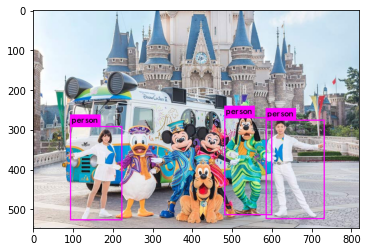

In [44]:
# 推論結果
from PIL import Image
import matplotlib.pyplot as plt
with Image.open('/content/drive/My Drive/ObjectDetection/darknet/predictions.jpg') as img:
    plt.imshow(img)
    plt.show()

In [14]:
cd '/content/drive/My Drive/keras-yolo3'

/content/drive/My Drive/keras-yolo3


In [15]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [16]:
!python yolo_video.py --input ./My_test/voce-5.jpg --image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

## 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。



In [36]:
cd /content/drive/My Drive/keras-yolo3

/content/drive/My Drive/keras-yolo3


In [148]:
!cat ./annotation.txt | head -n 10

simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0005.jpg,115,18,498,413,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0006.jpg,171,47,423,413,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0007.jpg,120,53,381,409,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0008.jpg,149,56,398,406,abraham_grampa_simpson
simpsons_dataset/abraham_grampa_simpson/pic_0009.jpg,205,41,470,456,abraham_grampa_simpson


In [149]:
!sed -e 's/simpsons_dataset/\.\.\/ObjectDetection\/simpsons_dataset/g' ./annotation.txt | sed 's/\.jpg\,/.jpg /g' > train.txt
!head train.txt

../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0006.jpg 171,47,423,413,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0007.jpg 120,53,381,409,abraham_grampa_simpson
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0008.jpg 149,56,398,406,abraham_grampa_simpson
../ObjectDetec

In [171]:
!cut -d ',' -f 6 ./annotation.txt | sort | uniq > classes.txt
!head classes.txt

abraham_grampa_simpson
apu_nahasapeemapetilon
bart_simpson
charles_montgomery_burns
chief_wiggum
comic_book_guy
edna_krabappel
homer_simpson
kent_brockman
krusty_the_clown


In [163]:
%%writefile unique.sh

#!/bin/bash

PATH='/content/drive/My\ Drive/keras-yolo3/'
count=0

while read class
do
    echo $class' to '$count
    /bin/sed -i -e s/\,$class/\,$count/g ./train.txt
    count=$(( count + 1 ))
done < ./classes.txt
exit 0

Overwriting unique.sh


In [164]:
!which -a sed

/bin/sed


In [165]:
!chmod 700 ./unique.sh
!./unique.sh
!head train.txt

abraham_grampa_simpson to 0
apu_nahasapeemapetilon to 1
bart_simpson to 2
charles_montgomery_burns to 3
chief_wiggum to 4
comic_book_guy to 5
edna_krabappel to 6
homer_simpson to 7
kent_brockman to 8
krusty_the_clown to 9
lisa_simpson to 10
marge_simpson to 11
milhouse_van_houten to 12
moe_szyslak to 13
ned_flanders to 14
nelson_muntz to 15
principal_skinner to 16
sideshow_bob to 17
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,0
../ObjectDetection/simpsons_dataset/abraham_grampa_simpson/pic_0006.jpg 171,47,423,4

## 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。



In [18]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [170]:
!python train.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn